# 用pytorch实现线性回归

In [8]:
import torch
import matplotlib.pyplot as plt

In [9]:
# 准备数据集
# 都是一维，列表示维度
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

In [10]:
# 设计模型
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # torch.nn.Linear是用来自动完成乘权重加偏置的运算y=Ax+b，
        # torch.nn.Linear(in_features,out_features,bias=True)输入样本的维度，和输出样本的维度，bias表示要不要加上偏置b        
        self.linear=torch.nn.Linear(1,1)
    # 前馈函数        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModel()

In [11]:
# 构造损失函数和优化器
# 二进制交叉熵损失函数BCELoss
# loss求和，size_average决定是否求均值
criterion = torch.nn.MSELoss(size_average = False)
# torch.optim.SGD随机梯度下降算法
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)# lr表示学习率

D:\software\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [12]:
epoch_list = []
l_list = []

In [13]:
# 训练循环
for epoch in range(1000):
    # 1.前馈    
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    epoch_list.append(epoch)
    l_list.append(loss.item())
    print(epoch,loss.item())
    # 梯度清零    
    optimizer.zero_grad()
    # 2.反馈    
    loss.backward()
    # 3.更新权重    
    optimizer.step()
    
print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred=',y_test.data)

0 36.83177185058594
1 16.52119255065918
2 7.477706432342529
3 3.450037717819214
4 1.6552929878234863
5 0.8546053767204285
6 0.49647122621536255
7 0.3353724479675293
8 0.2620125114917755
9 0.22773464024066925
10 0.21087856590747833
11 0.2018013298511505
12 0.19620922207832336
13 0.19219088554382324
14 0.18889518082141876
15 0.1859430968761444
16 0.183165043592453
17 0.18048566579818726
18 0.17787092924118042
19 0.17530536651611328
20 0.1727817803621292
21 0.17029671370983124
22 0.16784824430942535
23 0.1654357612133026
24 0.1630580723285675
25 0.1607145071029663
26 0.1584048718214035
27 0.1561284214258194
28 0.15388444066047668
29 0.15167298913002014
30 0.14949309825897217
31 0.14734460413455963
32 0.14522695541381836
33 0.14314009249210358
34 0.1410827934741974
35 0.1390552669763565
36 0.13705667853355408
37 0.13508713245391846
38 0.13314573466777802
39 0.13123203814029694
40 0.12934616208076477
41 0.1274871975183487
42 0.12565498054027557
43 0.12384918332099915
44 0.1220693439245224
4

366 0.0011541428975760937
367 0.001137568149715662
368 0.001121231820434332
369 0.0011051238980144262
370 0.001089220866560936
371 0.001073577906936407
372 0.0010581426322460175
373 0.0010429354151710868
374 0.0010279447305947542
375 0.0010131790768355131
376 0.0009986101649701595
377 0.0009842617437243462
378 0.0009701222297735512
379 0.0009561803308315575
380 0.0009424303425475955
381 0.0009288738947361708
382 0.0009155457373708487
383 0.0009023785823956132
384 0.0008894004859030247
385 0.000876635080203414
386 0.0008640218293294311
387 0.0008516119560226798
388 0.0008393811294808984
389 0.0008273174171335995
390 0.0008154239621944726
391 0.0008036908693611622
392 0.0007921573705971241
393 0.0007807640358805656
394 0.0007695483509451151
395 0.0007584859267808497
396 0.0007475893944501877
397 0.0007368411752395332
398 0.000726241385564208
399 0.0007158225052990019
400 0.0007055237656459212
401 0.0006953809061087668
402 0.0006853920640423894
403 0.0006755450740456581
404 0.000665841333

758 3.9616343201487325e-06
759 3.903980086761294e-06
760 3.848571395792533e-06
761 3.792313918893342e-06
762 3.738493660421227e-06
763 3.6847227420366835e-06
764 3.631674189819023e-06
765 3.5797804684989387e-06
766 3.527387434587581e-06
767 3.4776546726789093e-06
768 3.427524006838212e-06
769 3.377863549758331e-06
770 3.330261733935913e-06
771 3.282050784036983e-06
772 3.235027634218568e-06
773 3.1882404982752632e-06
774 3.142618197671254e-06
775 3.097324679401936e-06
776 3.053071168324095e-06
777 3.009439296874916e-06
778 2.9658203857252374e-06
779 2.9233146960905287e-06
780 2.8812166874558898e-06
781 2.8392266813170863e-06
782 2.799099320327514e-06
783 2.7583903374761576e-06
784 2.7190337732463377e-06
785 2.6796740257850615e-06
786 2.6412628812977346e-06
787 2.6034108486783225e-06
788 2.5655522222223226e-06
789 2.5296351395809324e-06
790 2.4932373889896553e-06
791 2.456829406582983e-06
792 2.421594672341598e-06
793 2.386703499723808e-06
794 2.352601541133481e-06
795 2.318566430403734

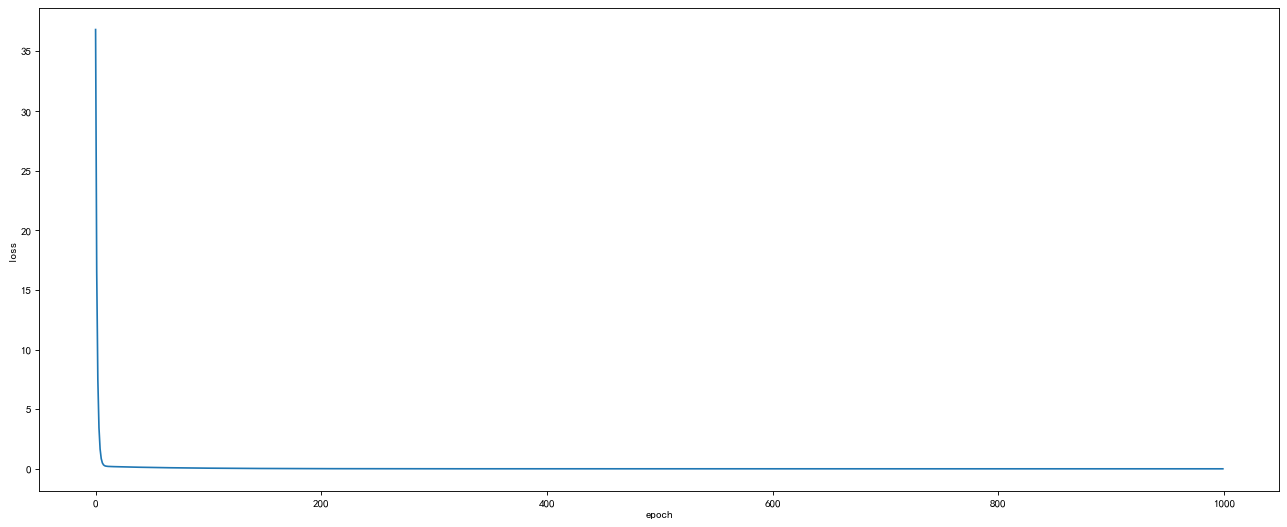

In [14]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(epoch_list,l_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()